# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [3]:
# Set monthly household income
monthly_income=12000
# YOUR CODE HERE!

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data=requests.get(btc_url)
#btc_data=btc_price.json()
btc_price=btc_data.json()['data']['1']['quotes']['USD']['price']
#btc_value
# Fetch current ETH price
# YOUR CODE HERE!]
eth_data=requests.get(eth_url)
eth_price=eth_data.json()['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=my_btc*btc_price
my_eth_value=my_eth*eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13703.62
The current value of your 5.3 ETH is $2006.53


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
print(type(alpaca_api_key))
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(type(alpaca_secret_key))

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

<class 'str'>
<class 'str'>


In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
#start_date = pd.Timestamp("2020--10-12", tz="America/New_York").isoformat()
#datetime.now()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
close_price=df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = start_date
).df
#close_price.columns
#close_price['AGG']['close'][0]

# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price=close_price['AGG']['close'][0]
spy_close_price=close_price['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $108.39
Current SPY closing price: $291.84


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy=50
my_agg=200
my_spy_value=my_spy*spy_close_price
my_agg_value=my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14592.00
The current value of your 200 AGG shares is $21678.00


### Savings Health Analysis

In [11]:
# Create savings DataFrame
# YOUR CODE HERE!
asset_type=['crypto','shares']

asset_values=[my_spy_value+my_agg_value,my_btc_value+my_eth_value]
df_savings=pd.DataFrame(asset_values,index=asset_type,columns=["Amount"],dtype='float')

# Display savings DataFrame
display(df_savings)
#df_savings.sum()[0]

,Amount
crypto,36270.000
shares,15710.143


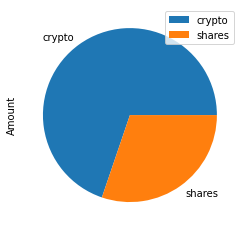

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(y="Amount",kind='pie',labels=asset_type) #y-column must be specified
#f_savings.iloc[0:1,0:1]

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=df_savings.sum()[0]

# Validate saving health
# YOUR CODE HERE!
if (total_savings>emergency_fund):
    print(f"Good job! You have more than enough money for ")
elif (total_savings==emergency_fund):
    print(f"Congrats! You've met your goal!")
else:
    print(f"You failed")

Good job! You have more than enough money for 


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date2 = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data=close_price=df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date2,
    end = end_date2
).df
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
# Set number of simulations
num_sims = 500
MC_sim=MCSimulation(portfolio_data=df_stock_data,weights=[.40,.60],num_simulation=num_sims,num_trading_days=252*30)


In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_sim.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005861,1.002794,0.986825,1.009461,1.013649,1.014495,1.011555,1.002564,1.002022,1.002739,...,0.998394,0.994156,0.995373,1.019195,1.007691,1.002530,1.004135,0.993415,0.988374,0.999450
2,1.008802,1.002875,0.980513,1.012287,1.020082,1.016745,1.010370,1.009552,0.999284,1.000381,...,0.994027,0.998465,0.990282,1.032078,1.002699,1.007372,1.013961,0.999891,0.990919,0.994334
3,1.014204,0.999259,0.973397,1.022216,1.022523,1.020881,0.993525,1.025026,1.007612,0.991818,...,0.989565,1.008043,0.992224,1.022938,1.000534,1.001681,1.012097,0.986346,1.002431,1.001122
4,1.019253,1.004641,0.978495,1.014835,1.025999,1.015734,1.000828,1.037995,1.014333,1.007479,...,0.988644,1.005272,0.981712,1.025907,0.990014,1.001582,1.016772,0.996320,1.006596,1.005886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.912884,41.295887,15.589821,3.663257,5.854386,6.680665,12.270520,4.352331,11.219426,5.145181,...,18.807519,11.379640,6.033173,13.063066,11.089344,12.660806,34.496087,10.680715,4.811515,4.474940
7557,5.892887,41.485548,15.546888,3.652575,5.846349,6.626485,12.330634,4.395481,11.248886,5.180766,...,18.849785,11.454409,6.086449,13.267586,11.094466,12.498021,34.550496,10.702155,4.824710,4.442008
7558,5.892512,41.633674,15.523173,3.635408,5.830017,6.575520,12.485739,4.378154,11.053458,5.168310,...,18.891289,11.400146,6.152719,13.301149,11.109609,12.189820,34.263505,10.683367,4.779139,4.492591
7559,5.943954,41.903252,15.439483,3.635069,5.842474,6.564673,12.558737,4.401347,10.902127,5.160726,...,19.029943,11.314852,6.154347,13.199769,11.082454,12.296514,34.354168,10.762565,4.805354,4.532547


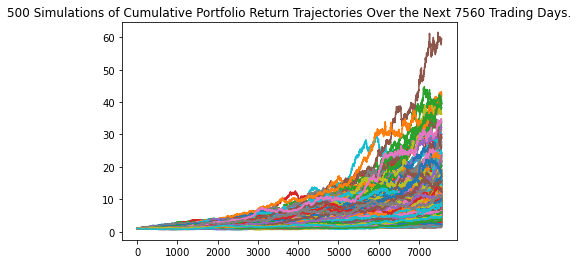

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot=MC_sim.plot_simulation()
line_plot

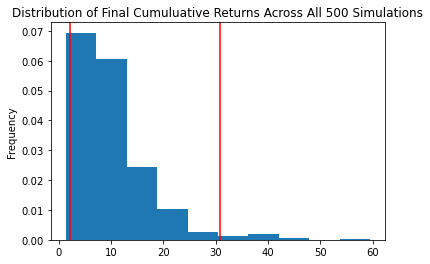

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot=MC_sim.plot_distribution()
dist_plot

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl=MC_sim.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean             10.315974
std               7.504676
min               1.324061
25%               5.180812
50%               8.502043
75%              12.882578
max              59.521974
95% CI Lower      2.118106
95% CI Upper     30.824230
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $42362.11 and $616484.61


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $63543.17 and $924726.91


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
#Storing DataFrame with Closing Prices
df_returns=pd.DataFrame()
df_returns['AGG']=MC_sim.portfolio_data['AGG']['daily_return']
df_returns['SPY']=MC_sim.portfolio_data['SPY']['daily_return']
mu_returns=df_returns.mean()*np.sqrt(5*252)
std_returns=df_returns.std()*np.sqrt(5*252)
#Computing Estimates of Parameters
mu_agg=mu_returns[0]
mu_spy=mu_returns[1]
sigma_sq_agg=np.power(std_returns[0],2)
sigma_sq_spy=np.power(std_returns[1],2)
corr_agg_spy=df_returns.corr().values[0,1] #5-year correlation
covar=df_returns.cov().values[0,1]

#Estimation of the Tangency Portfolio
w1=(mu_agg*sigma_sq_spy-mu_spy*covar)/(mu_agg*sigma_sq_spy+mu_spy*sigma_sq_agg-(mu_agg+mu_spy)*covar)
w2=1-w1
new_weights=[w1,w2]

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_sim2=MCSimulation(portfolio_data=df_stock_data,weights=new_weights,num_simulation=num_sims,num_trading_days=252*5)
MC_sim2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002582,0.999537,1.003663,1.003840,0.998439,1.000727,1.003922,1.002393,0.999392,1.009329,...,0.998893,0.995968,1.002829,1.004023,1.000753,1.002754,1.004580,1.005407,0.992620,0.997814
2,0.999863,1.000372,1.010196,1.002958,0.999925,0.999868,1.000518,1.001624,0.997149,1.011661,...,0.996352,0.994208,1.008798,1.004608,1.001462,1.001891,1.001552,1.015676,0.988030,1.001591
3,0.999775,1.003389,1.008023,1.003172,1.004837,1.004851,0.999802,0.999353,0.998867,1.014005,...,1.002656,0.995709,1.006469,1.001122,1.001974,1.011626,0.997672,1.012529,0.981525,1.001535
4,1.002415,1.011149,1.001183,1.001488,1.002459,1.008558,0.999688,1.000241,0.997221,1.015275,...,1.001298,0.992756,1.002213,1.007985,1.001002,1.012300,0.992595,1.007640,0.977276,1.001143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.358802,1.178467,1.194623,1.420007,1.624084,1.296324,1.270664,1.499749,1.679414,1.233584,...,1.413831,1.077343,1.891740,1.310800,0.967880,1.388793,1.147297,1.224394,0.981331,1.180573
1257,1.359369,1.181763,1.199950,1.423044,1.614018,1.296307,1.266831,1.507619,1.686509,1.226297,...,1.410831,1.074450,1.888166,1.305953,0.969427,1.384793,1.152202,1.225626,0.985122,1.185087
1258,1.363753,1.185878,1.194973,1.421861,1.610789,1.297906,1.267767,1.501924,1.694702,1.228014,...,1.404761,1.073373,1.891290,1.305770,0.968288,1.385952,1.139068,1.224834,0.981551,1.181164
1259,1.360273,1.194278,1.192789,1.425334,1.617179,1.299660,1.272962,1.502133,1.695051,1.229999,...,1.404981,1.070360,1.902273,1.302380,0.963210,1.379879,1.137053,1.224791,0.981361,1.171028


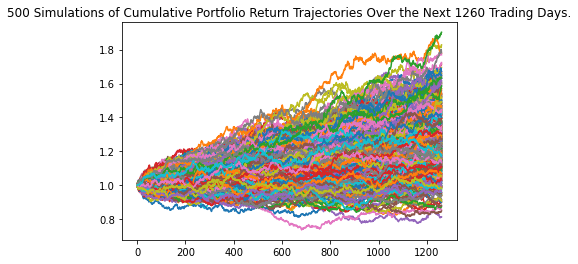

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot2=MC_sim2.plot_simulation()
line_plot2

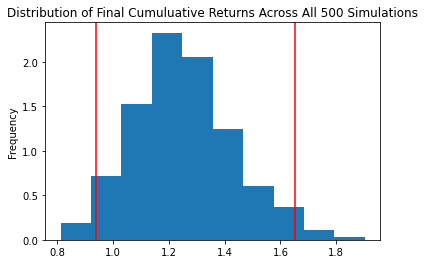

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot2=MC_sim2.plot_distribution()
dist_plot2

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five=MC_sim2.summarize_cumulative_return()
# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.255167
std               0.180089
min               0.812411
25%               1.132721
50%               1.243389
75%               1.361503
max               1.902531
95% CI Lower      0.940786
95% CI Upper      1.651690
Name: 1260, dtype: float64


In [30]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five=60000.0
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five=round(tbl_five[8]*initial_investment_five,2)
ci_upper_five=round(tbl_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000.0 in the portfolio over the next 5 years will end within in the range of $56447.15 and $99101.41


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_sim3=MCSimulation(portfolio_data=df_stock_data,weights=new_weights,num_simulation=num_sims,num_trading_days=252*10)


In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_sim3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998545,1.002315,0.998752,1.001506,1.000309,1.000188,0.999618,1.002869,1.000352,0.991967,...,1.001348,0.998198,1.002044,1.006560,1.002839,0.996100,0.999977,1.003511,1.004970,0.997762
2,1.000399,0.998861,1.006844,0.999731,1.000009,0.993720,1.002942,1.007603,0.997237,0.985413,...,1.000855,1.001777,1.001832,1.007483,1.004473,0.992881,1.004312,1.003529,1.009028,0.996290
3,1.003529,0.994933,1.012121,0.999474,0.998580,0.991074,0.997452,1.012877,1.000431,0.983697,...,1.001711,0.999185,1.003277,1.005209,1.004631,0.984062,1.006395,1.004238,1.006298,0.993900
4,1.005649,0.995334,1.014631,0.994143,0.995387,0.991435,1.002327,1.017654,1.001719,0.983687,...,1.006358,1.002257,0.999830,1.005296,1.007820,0.986812,1.006060,1.007148,1.007947,0.999836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.720600,1.583253,1.632781,1.074184,1.119626,1.643968,1.674067,1.670262,1.185481,2.158906,...,1.087844,1.302092,1.087240,1.852892,1.554383,2.275450,1.595856,1.377818,1.302499,1.405929
2517,1.718263,1.583800,1.632539,1.081883,1.116073,1.645949,1.669164,1.670965,1.187035,2.155612,...,1.082731,1.304679,1.091583,1.857334,1.554412,2.282776,1.596183,1.384610,1.299570,1.410498
2518,1.727417,1.574419,1.627609,1.075531,1.111074,1.636963,1.663921,1.678330,1.184469,2.162918,...,1.089089,1.296124,1.090772,1.843905,1.561549,2.289805,1.593571,1.379949,1.303071,1.407622
2519,1.735267,1.585107,1.630726,1.074656,1.114013,1.632219,1.665872,1.677627,1.188710,2.144986,...,1.095883,1.292091,1.096508,1.850168,1.563559,2.291148,1.596781,1.386773,1.297203,1.405752


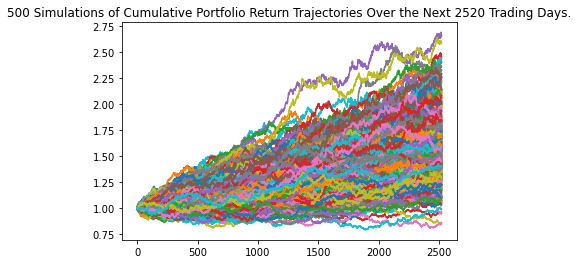

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot3=MC_sim3.plot_simulation()
line_plot3

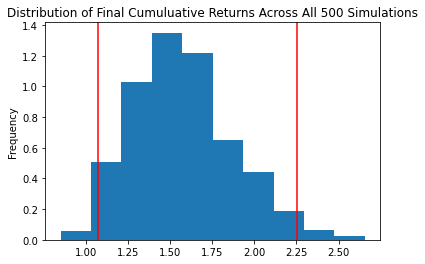

In [34]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot3=MC_sim3.plot_distribution()
dist_plot3

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten=MC_sim3.summarize_cumulative_return()
# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.572022
std               0.302997
min               0.849510
25%               1.358434
50%               1.555458
75%               1.748371
max               2.656246
95% CI Lower      1.070538
95% CI Upper      2.251312
Name: 2520, dtype: float64


In [36]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten=60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten=round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten=round(tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $64232.28 and $135078.75
